***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***


Credits: The data imports and normalisation code snippets were extracted from https://towardsdatascience.com/keras-with-r-predicting-car-sales-31f48a58bf6

## Download Keras

In [1]:
devtools::install_github("rstudio/keras")

Skipping install of 'keras' from a github remote, the SHA1 (59fc3256) has not changed since last install.
  Use `force = TRUE` to force installation


## Import the Keras library

In [0]:
library(keras)

## Load the car sales dataset

In [0]:
sales <- read.csv(url("https://raw.githubusercontent.com/MGCodesandStats/datasets/master/cars.csv"), header = TRUE) 

## Normalise the data

In [4]:
#Max-Min Normalization
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
maxmindf <- as.data.frame(lapply(sales, normalize))
attach(maxmindf)

The following object is masked _by_ .GlobalEnv:

    sales



In [5]:
maxmindf

age,gender,miles,debt,income,sales
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.21951220,0,0.14942529,0.000000000,0.34243943,0.004078026
0.17073171,0,0.19540230,0.000000000,0.22364244,0.043906749
0.26829268,1,0.55172414,0.695599799,0.51921470,0.926187725
0.17073171,1,0.17241379,0.722302158,0.63709273,0.943247468
0.02439024,1,0.08045977,0.116764263,0.67426901,0.133827228
0.95121951,1,0.09195402,0.000000000,0.10543024,0.054441650
0.60975610,1,0.08045977,0.006993475,0.58621554,0.272548087
0.48780488,1,0.20689655,0.000000000,0.27418546,0.000000000
0.60975610,0,0.16091954,0.815191568,0.83375104,0.764527968


## Remove the header from the data frame and convert into a matrix

In [0]:
names(maxmindf) <- NULL
sales = data.matrix(maxmindf)

## Check the dimensions

In [7]:
dim(sales)

[1] 963   6

## Have a look at some of the data

In [8]:
sales[0:10,]

0.21951220,0,0.14942529,0.000000000,0.3424394,0.004078026
0.17073171,0,0.19540230,0.000000000,0.2236424,0.043906749
0.26829268,1,0.55172414,0.695599799,0.5192147,0.926187725
0.17073171,1,0.17241379,0.722302158,0.6370927,0.943247468
0.02439024,1,0.08045977,0.116764263,0.6742690,0.133827228
0.95121951,1,0.09195402,0.000000000,0.1054302,0.054441650
0.60975610,1,0.08045977,0.006993475,0.5862155,0.272548087
0.48780488,1,0.20689655,0.000000000,0.2741855,0.000000000
0.60975610,0,0.16091954,0.815191568,0.8337510,0.764527968
0.65853659,1,0.41379310,0.967492053,0.6819549,0.884150071


### Check a summary of the data

In [9]:
summary(sales)

       V1               V2              V3               V4         
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.1951   1st Qu.:0.000   1st Qu.:0.1149   1st Qu.:0.02468  
 Median :0.4390   Median :1.000   Median :0.1724   Median :0.10433  
 Mean   :0.4627   Mean   :0.513   Mean   :0.2035   Mean   :0.23605  
 3rd Qu.:0.7317   3rd Qu.:1.000   3rd Qu.:0.2529   3rd Qu.:0.27917  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.00000  
       V5               V6        
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2929   1st Qu.:0.1038  
 Median :0.5313   Median :0.2933  
 Mean   :0.5160   Mean   :0.3803  
 3rd Qu.:0.7226   3rd Qu.:0.6370  
 Max.   :1.0000   Max.   :1.0000  

## Split data into features and target

In [0]:
sales_features <- sales[,1:5]
sales_target <- sales[,6]

## Split the data into training and testing

In [0]:
# Determine sample size
ind <- sample(2, nrow(sales), replace=TRUE, prob=c(0.67, 0.33))

# Split the `iris` data
x_train <- sales_features[ind==1, 1:4]
x_test <- sales_features[ind==2, 1:4]

# Split the class attribute
y_train <- sales_target[ind==1]
y_test <- sales_target[ind==2]

## Define the model architecture

In [0]:
model <- keras_model_sequential() %>%
    layer_dense(units = 16, activation = "relu",kernel_initializer='RandomNormal',input_shape = dim(x_train)[2]) %>%
    layer_dense(units = 8,kernel_initializer='RandomNormal', activation = "relu") %>%
    layer_dense(units = 4,kernel_initializer='RandomNormal', activation = "relu") %>%
    layer_dense(units = 1)

## Compile the model

In [0]:
model %>% compile(
    loss = "mse",
    optimizer = 'adam',
    metrics = list("mean_absolute_error")
  )

## Train the model

In [0]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 220, batch_size = 50, 
  validation_split = 0.2, shuffle = TRUE
)

## Plot the performance

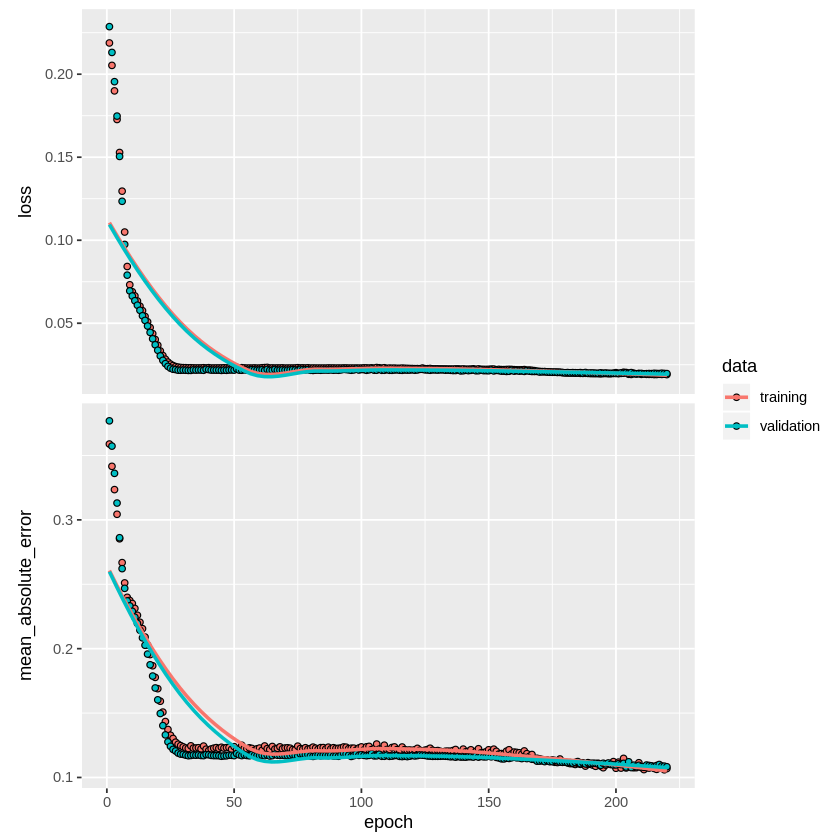

In [0]:
plot(history)

## Evaluate the performance

In [0]:
model %>% evaluate(x_test, y_test)

$loss
[1] 0.01676406

$mean_absolute_error
[1] 0.09962519